# Diabeties Case Study

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv(r"C:\Users\sunita.chalwadi\Desktop\diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [19]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
df_0 = df[df['Outcome']==1]
df_1 = df[df['Outcome']==0].sample(n=268, random_state=2)
df_new = pd.concat([df_1, df_0])

In [17]:
df_new["Outcome"].value_counts()

1    268
0    268
Name: Outcome, dtype: int64

# MinMax scaler

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
df1 = df_new.copy()
for col in df1:
    mx = MinMaxScaler()
    df1[col] = mx.fit_transform(df1[[col]])
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
204,0.352941,0.517588,0.590164,0.323232,0.224586,0.561848,0.105038,0.566667,0.0
453,0.117647,0.597990,0.000000,0.000000,0.000000,0.292101,0.321947,0.850000,0.0
671,0.058824,0.497487,0.475410,0.101010,0.000000,0.378539,0.201964,0.000000,0.0
587,0.352941,0.517588,0.540984,0.000000,0.000000,0.362146,0.073015,0.133333,0.0
365,0.294118,0.497487,0.442623,0.282828,0.098109,0.506706,0.179761,0.150000,0.0


# Dividing data in X and Y variables

In [24]:
df_new["Outcome"].value_counts()

1    268
0    268
Name: Outcome, dtype: int64

In [25]:
x = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [26]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
204,0.352941,0.517588,0.590164,0.323232,0.224586,0.561848,0.105038,0.566667
453,0.117647,0.597990,0.000000,0.000000,0.000000,0.292101,0.321947,0.850000
671,0.058824,0.497487,0.475410,0.101010,0.000000,0.378539,0.201964,0.000000
587,0.352941,0.517588,0.540984,0.000000,0.000000,0.362146,0.073015,0.133333
365,0.294118,0.497487,0.442623,0.282828,0.098109,0.506706,0.179761,0.150000


In [35]:
y.head()

204    0.0
453    0.0
671    0.0
587    0.0
365    0.0
Name: Outcome, dtype: float64

# Test and Train split  

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,
                                                 random_state=1)

# Logistic regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
log = LogisticRegression()

In [40]:
log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
log.score(x_test,y_test)

0.6708074534161491

In [46]:
log.score(x_train,y_train)

0.7413333333333333

In [47]:
df_new.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.126781,0.130888,-0.098653,-0.072781,-0.038966,-0.055248,0.513352,0.216720
Glucose,0.126781,1.000000,0.106589,0.054759,0.324213,0.191720,0.118647,0.258408,0.447673
BloodPressure,0.130888,0.106589,1.000000,0.212059,0.094693,0.209297,0.018862,0.237812,0.061771
SkinThickness,-0.098653,0.054759,0.212059,1.000000,0.439667,0.394658,0.223680,-0.120813,0.058609
Insulin,-0.072781,0.324213,0.094693,0.439667,1.000000,0.169343,0.179617,-0.039558,0.092935
BMI,-0.038966,0.191720,0.209297,0.394658,0.169343,1.000000,0.124027,-0.034200,0.299744
DiabetesPedigreeFunction,-0.055248,0.118647,0.018862,0.223680,0.179617,0.124027,1.000000,-0.007496,0.182957
Age,0.513352,0.258408,0.237812,-0.120813,-0.039558,-0.034200,-0.007496,1.000000,0.218665
Outcome,0.216720,0.447673,0.061771,0.058609,0.092935,0.299744,0.182957,0.218665,1.000000


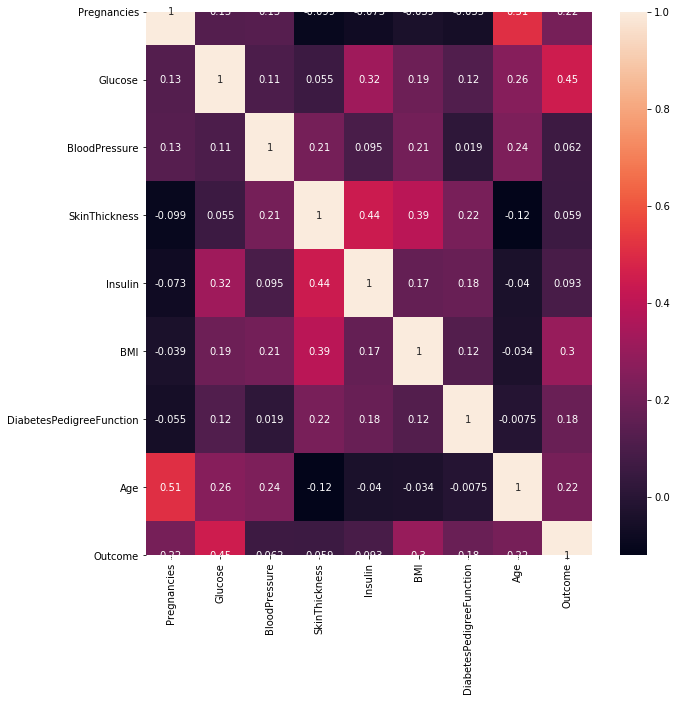

In [48]:
cor = df_new.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor, annot=True)
plt.show()

# Evaluation Matrix

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
y_pred = log.predict(x_test)

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.62      0.73      0.67        74
         1.0       0.73      0.62      0.67        87

    accuracy                           0.67       161
   macro avg       0.68      0.68      0.67       161
weighted avg       0.68      0.67      0.67       161



In [52]:
from sklearn.metrics import roc_curve
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(tp, fn)
print(fp, tn)
fpr, tpr, threshold = roc_curve(y_test, y_pred)

54 33
20 54


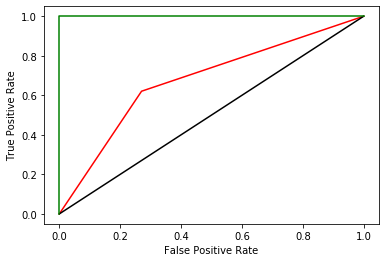

In [53]:
plt.plot(fpr, tpr, 'r-')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1],[0,1,1],'g-',label='perfect')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [54]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print(auc)

0.6752096924510718


# feature selection Method

In [55]:
df_new.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.126781,0.130888,-0.098653,-0.072781,-0.038966,-0.055248,0.513352,0.216720
Glucose,0.126781,1.000000,0.106589,0.054759,0.324213,0.191720,0.118647,0.258408,0.447673
BloodPressure,0.130888,0.106589,1.000000,0.212059,0.094693,0.209297,0.018862,0.237812,0.061771
SkinThickness,-0.098653,0.054759,0.212059,1.000000,0.439667,0.394658,0.223680,-0.120813,0.058609
Insulin,-0.072781,0.324213,0.094693,0.439667,1.000000,0.169343,0.179617,-0.039558,0.092935
BMI,-0.038966,0.191720,0.209297,0.394658,0.169343,1.000000,0.124027,-0.034200,0.299744
DiabetesPedigreeFunction,-0.055248,0.118647,0.018862,0.223680,0.179617,0.124027,1.000000,-0.007496,0.182957
Age,0.513352,0.258408,0.237812,-0.120813,-0.039558,-0.034200,-0.007496,1.000000,0.218665
Outcome,0.216720,0.447673,0.061771,0.058609,0.092935,0.299744,0.182957,0.218665,1.000000


There is no significant correlation between Outcome & other independent variables

In [56]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

In [57]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(x_train,y_train)

In [58]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores

,Specs,Score
0,Pregnancies,4.157629
1,Glucose,3.858161
2,BloodPressure,0.167831
3,SkinThickness,0.173622
4,Insulin,0.973866
5,BMI,0.759020
6,DiabetesPedigreeFunction,1.192473
7,Age,4.717273


In [60]:
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split(df_new, y, test_size=0.3)
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [61]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [62]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
xgb = XGBClassifier(base_estimator = DecisionTreeClassifier())
xgb.fit(x_train, y_train)
xgb.score(x_test,y_test)

1.0

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt = DecisionTreeClassifier()

In [64]:

dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [67]:
dt.score(x_test, y_test)

1.0

[Text(167.4, 163.07999999999998, 'X[8] <= 0.5\ngini = 0.5\nsamples = 375\nvalue = [193, 182]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 193\nvalue = [193, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 182\nvalue = [0, 182]')]

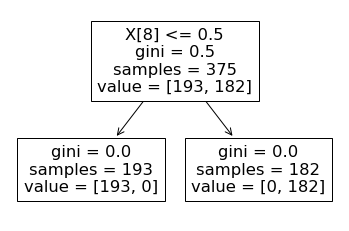

In [68]:
tree.plot_tree(dt.fit(x_train, y_train))

1.0

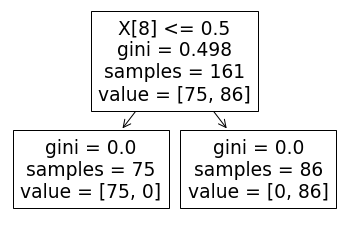

In [69]:
tree.plot_tree(dt.fit(x_test, y_test))
dt.score(x_test, y_test)


In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score(y_test,y_pred)
from sklearn.decomposition import PCA

In [71]:
for i in range(7,0,-1):
    pca = PCA(n_components =i)
    x_pca=pca.fit_transform(x)
    x_train,x_test,y_train,y_test = train_test_split(x_pca,y,test_size=0.3)
    log=LogisticRegression()
    log.fit(x_train,y_train)
    y_pred=log.predict(x_test)
    print("Components ={} Accuracy ={}".format(i,accuracy_score(y_test,y_pred)))

Components =7 Accuracy =0.7639751552795031
Components =6 Accuracy =0.6708074534161491
Components =5 Accuracy =0.7329192546583851
Components =4 Accuracy =0.7329192546583851
Components =3 Accuracy =0.7142857142857143
Components =2 Accuracy =0.7080745341614907
Components =1 Accuracy =0.6273291925465838
